# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [1]:
!pwd
!ls -al

/c/Users/power/OneDrive/desktop/dc-ds-071519/1-Module/week-2/day-6-pandas-part-2
total 133
drwxr-xr-x 1 power 197609      0 Jul 23 09:11 .
drwxr-xr-x 1 power 197609      0 Jul 23 09:11 ..
drwxr-xr-x 1 power 197609      0 Jul 22 09:42 .ipynb_checkpoints
-rw-r--r-- 1 power 197609  11325 Jul 22 09:43 heart.csv
-rw-r--r-- 1 power 197609 113062 Jul 22 10:58 manipulating_data_with_pandas_edit.ipynb
-rw-r--r-- 1 power 197609   3356 Jul 22 09:36 pre_process_animal_shelter_data.py
-rw-r--r-- 1 power 197609    136 Jul 22 09:36 states.csv


In [2]:
import pandas as pd
uci = pd.read_csv('heart.csv')

In [3]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [4]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
uci.shape

(303, 14)

In [6]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [7]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# Call the .describe() method on our dataset. What do you observe?

uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
uci.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# Use the code below. How does the output differ from info() ?
uci.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [11]:
uci.ca.mean()

0.7293729372937293

#### The Axis Variable

In [12]:
uci.sum() # Try [shift] + [tab] here!

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [13]:
uci['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Exercise: What are the different values for restecg?

In [14]:
import matplotlib.pyplot as plt

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

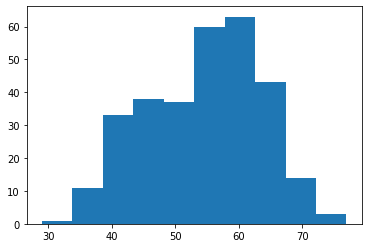

In [15]:
# Your code here!
plt.hist(uci['age'])

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [16]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [17]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104491 entries, 0 to 104490
Data columns (total 12 columns):
Animal ID           104491 non-null object
Name                71716 non-null object
DateTime            104491 non-null object
MonthYear           104491 non-null object
Date of Birth       104491 non-null object
Outcome Type        104484 non-null object
Outcome Subtype     47590 non-null object
Animal Type         104491 non-null object
Sex upon Outcome    104489 non-null object
Age upon Outcome    104477 non-null object
Breed               104491 non-null object
Color               104491 non-null object
dtypes: object(12)
memory usage: 9.6+ MB


In [18]:
animal_outcomes.Breed.value_counts()[:10]

Domestic Shorthair Mix       29921
Pit Bull Mix                  7936
Labrador Retriever Mix        6181
Chihuahua Shorthair Mix       5985
Domestic Medium Hair Mix      3018
German Shepherd Mix           2686
Bat Mix                       1741
Domestic Shorthair            1710
Domestic Longhair Mix         1487
Australian Cattle Dog Mix     1346
Name: Breed, dtype: int64

What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [19]:
animal_outcomes[(animal_outcomes['Animal Type']=='Dog') \
                & (animal_outcomes['Outcome Type']=='Adoption')\
               ].Breed.value_counts()[:10]

Labrador Retriever Mix       3117
Pit Bull Mix                 3075
Chihuahua Shorthair Mix      2864
German Shepherd Mix          1357
Australian Cattle Dog Mix     753
Dachshund Mix                 477
Border Collie Mix             459
Boxer Mix                     405
Catahoula Mix                 330
Staffordshire Mix             327
Name: Breed, dtype: int64

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [20]:
def successor(x):
    return x + 1

In [21]:
uci.applymap(successor).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [22]:
uci['age'].apply(successor).tail(10)==uci['age'].map(successor).tail(10)

293    True
294    True
295    True
296    True
297    True
298    True
299    True
300    True
301    True
302    True
Name: age, dtype: bool

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [23]:
uci['oldpeak'].map(lambda x: round(x))[:4]

0    2
1    4
2    1
3    1
Name: oldpeak, dtype: int64

Exercise: Use an anonymous function to turn the entries in age to strings

In [24]:
uci['age'].map(lambda x: str(x))

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
273    58
274    47
275    52
276    58
277    57
278    58
279    61
280    42
281    52
282    59
283    40
284    61
285    46
286    59
287    57
288    57
289    55
290    61
291    58
292    58
293    67
294    44
295    63
296    63
297    59
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [25]:
animal_outcomes['datetime']=pd.to_datetime(animal_outcomes['DateTime'])# Your code here

In [26]:
animal_outcomes['dob']=pd.to_datetime(animal_outcomes['Date of Birth'])

In [27]:
animal_outcomes['dob'].dt.to_period("M")

0         2019-06
1         2019-04
2         2018-07
3         2019-05
4         2017-07
5         2010-06
6         2013-06
7         2009-07
8         2019-04
9         2018-11
10        2018-08
11        2019-04
12        2019-04
13        2019-04
14        2019-03
15        2019-03
16        2017-07
17        2016-07
18        2018-07
19        2019-02
20        2019-03
21        2019-04
22        2019-04
23        2019-04
24        2019-01
25        2010-07
26        2014-06
27        2019-03
28        2019-04
29        2016-12
           ...   
104461    2010-09
104462    1999-09
104463    2011-09
104464    1999-09
104465    2012-12
104466    2003-09
104467    2013-09
104468    2013-09
104469    2013-09
104470    2013-09
104471    2013-09
104472    2013-05
104473    2013-08
104474    2010-05
104475    2012-03
104476    2006-10
104477    2011-09
104478    2010-09
104479    2012-09
104480    2013-03
104481    2013-04
104482    2004-09
104483    2010-09
104484    2011-09
104485    

In [37]:
animal_outcomes['age']=(animal_outcomes['dob']- animal_outcomes['datetime']).dt.days

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [38]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [39]:
uci.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [47]:
uci.groupby('sex').# .tail()

AttributeError: 'dict' object has no attribute 'info'

### Aggregating

In [73]:
uci.groupby('sex').std()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,9.409396,0.972427,19.311119,65.088946,0.332455,0.557150,20.047969,0.422503,1.119844,0.593736,0.881026,0.441290,0.435286
1,8.883803,1.059064,16.658246,42.782392,0.366955,0.510754,24.130882,0.484505,1.174632,0.627378,1.074082,0.659949,0.498626


Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [83]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,datetime,dob
0,A800130,Kolby,07/21/2019 10:56:00 PM,07/21/2019 10:56:00 PM,05/01/2019,Adoption,NaN,Dog,Spayed Female,2 months,Boxer,Brown,2019-07-21 22:56:00,2019-05-01
1,A799457,Hazel,07/21/2019 10:55:00 PM,07/21/2019 10:55:00 PM,07/08/2013,NaN,NaN,Dog,Spayed Female,6 years,Pit Bull,Tan/White,2019-07-21 22:55:00,2013-07-08
2,A800069,NaN,07/21/2019 07:57:00 PM,07/21/2019 07:57:00 PM,06/02/2019,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair,Orange Tabby,2019-07-21 19:57:00,2019-06-02
3,A795483,*Herb,07/21/2019 07:15:00 PM,07/21/2019 07:15:00 PM,04/21/2019,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Orange Tabby/White,2019-07-21 19:15:00,2019-04-21
4,A795482,*Rain,07/21/2019 07:13:00 PM,07/21/2019 07:13:00 PM,04/21/2019,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Orange Tabby/White,2019-07-21 19:13:00,2019-04-21


In [52]:
animal_outcomes.groupby('Animal Type')['age'].mean()/365

Animal Type
Bird        -1.404866
Cat         -1.480752
Dog         -2.808338
Livestock   -1.152055
Other       -1.273121
Name: age, dtype: float64

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [51]:
# Your code here
animal_outcomes['year']=animal_outcomes['datetime'].dt.year
animal_outcomes['month']=animal_outcomes['datetime'].dt.month
animal_outcomes[animal_outcomes['Outcome Type']=='Adoption'].groupby(['year','month']).size().reset_index()

,year,month,0
0,2013,10,606
1,2013,11,552
2,2013,12,684
3,2014,1,518
4,2014,2,437
5,2014,3,483
6,2014,4,439
7,2014,5,507
8,2014,6,660
9,2014,7,907


In [54]:
uci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [69]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [82]:
uci.pivot_table(index = ['age'], columns='sex', values='target')

sex,0,1
age,,
29,NaN,1.000000
34,1.000000,1.000000
35,1.000000,0.333333
37,1.000000,1.000000
38,NaN,0.666667
39,1.000000,0.500000
40,NaN,0.333333
41,1.000000,0.833333
42,1.000000,0.833333


In [56]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,datetime,dob,age,year,month
0,A798909,NaN,07/22/2019 09:34:00 PM,07/22/2019 09:34:00 PM,06/02/2019,Adoption,NaN,Cat,Spayed Female,1 month,Domestic Shorthair,Black,2019-07-22 21:34:00,2019-06-02,-51,2019,7
1,A798933,NaN,07/22/2019 09:33:00 PM,07/22/2019 09:33:00 PM,04/17/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Blue Tabby/White,2019-07-22 21:33:00,2019-04-17,-97,2019,7
2,A800552,NaN,07/22/2019 07:34:00 PM,07/22/2019 07:34:00 PM,07/22/2018,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat,Brown,2019-07-22 19:34:00,2018-07-22,-366,2019,7
3,A799925,NaN,07/22/2019 07:27:00 PM,07/22/2019 07:27:00 PM,05/01/2019,Adoption,NaN,Dog,Neutered Male,2 months,Labrador Retriever/German Shepherd,Black,2019-07-22 19:27:00,2019-05-01,-83,2019,7
4,A800293,Brixton,07/22/2019 07:26:00 PM,07/22/2019 07:26:00 PM,07/18/2017,Adoption,NaN,Dog,Neutered Male,2 years,Pit Bull,Brown/White,2019-07-22 19:26:00,2017-07-18,-735,2019,7


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

In [65]:
pd.pivot_table(animal_outcomes, index=['year','month'],columns='Animal Type')

age                                                
Animal Type         Bird          Cat          Dog Livestock       Other
year month                                                              
2013 10              NaN  -490.945634  -981.033898   -1845.0 -405.000000
     11      -371.666667  -559.841986  -970.722424    -187.0 -393.742424
     12      -370.000000  -597.726126  -983.425365       NaN -574.930233
2014 1               NaN  -811.324251 -1068.555814       NaN -495.293103
     2       -366.000000 -1090.872180 -1037.359173       NaN -532.747368
     3       -258.500000  -760.997024 -1054.827699    -206.5 -412.346491
     4       -849.400000  -535.287946 -1053.501771       NaN -398.321739
     5       -471.600000  -388.405145 -1044.866159       NaN -436.738095
     6        -16.000000  -439.375622 -1028.950820    -208.0 -330.820225
     7        -29.600000  -358.092734 -1036.623566       NaN -337.972973
     8       -342.500000  -423.954208  -982.509740       NaN -362.878261
     9       -189.625000  -379.887918 -1031.388952       NaN -483.666667
     10      -372.000000  -556.580268  -983.402339       NaN -432.898551
     11              NaN  -581.306358 -1064.409302       NaN -553.795455
     12      -604.714286  -760.248848 -1014.829016       NaN -506.098039
2015 1       -738.750000  -870.902655  -994.161836       NaN -501.966667
     2       -550.000000  -794.202290  -998.840244       NaN -370.390244
     3       -463.500000  -911.590909 -1116.331250       NaN -421.514925
     4       -227.800000  -665.608899 -1118.359857       NaN -442.738318
     5       -254.700000  -505.309456 -1071.679889    -745.0 -373.261905
     6       -687.750000  -403.707865  -991.799131       NaN -307.861111
     7       -543.666667  -346.170082 -1132.627907       NaN -460.409836
     8      -1096.000000  -420.161963 -1018.915764       NaN -387.795455
     9       -370.666667  -426.787962 -1093.867647       NaN -376.557692
     10      -440.125000  -511.791304 -1142.511450       NaN -405.202247
     11      -402.000000  -482.159677 -1079.423383       NaN -429.462963
     12              NaN  -517.775304 -1094.259398    -403.0 -466.820513
2016 1       -492.166667  -729.432161 -1122.988249    -383.0 -467.979592
     2       -611.666667  -942.628472 -1108.344180       NaN -582.142857
     3       -520.250000  -929.660131 -1094.421237       NaN -509.599034
...                  ...          ...          ...       ...         ...
2017 2       -461.250000  -712.972050 -1073.561443       NaN -473.552632
     3       -411.400000  -724.464072 -1104.440197    -242.0 -485.094972
     4       -430.500000  -574.365854 -1082.931298       NaN -514.389831
     5       -286.473684  -551.304553  -981.236383       NaN -411.034483
     6       -467.285714  -408.306283 -1019.529566       NaN -368.145299
     7       -298.230769  -378.694103  -967.284534       NaN -465.494949
     8       -438.500000  -473.519380 -1006.486683       NaN -555.439252
     9       -413.250000  -600.919105 -1032.585834       NaN -493.297619
     10      -393.875000  -623.769492 -1038.506289       NaN -505.195122
     11      -275.857143  -667.947484 -1007.149786       NaN -503.837209
     12      -199.500000  -727.164444 -1145.542707       NaN -591.666667
2018 1       -409.000000  -961.145015 -1067.767230       NaN -576.854545
     2       -619.666667 -1008.331010 -1070.853147    -769.0 -617.274510
     3       -379.000000  -848.493103  -996.690588       NaN -574.223022
     4      -1032.090909  -794.017544 -1045.272050       NaN -418.757009
     5       -986.000000  -565.033272  -949.670574       NaN -375.921348
     6       -535.285714  -420.695431  -998.880364       NaN -445.942857
     7      -1320.555556  -546.293801  -950.370629       NaN -471.534483
     8       -528.857143  -502.612303  -969.123570       NaN -551.775862
     9       -384.225806  -499.238779  -943.277970       NaN -556.966102
     10      -444.272727  -512.883895  -900.415116     -16.0 -512.500000
     1

### `.join()`

In [85]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [86]:
toy1.join(toy2.set_index('age'),
          on = 'age',
          lsuffix = '_A',
          rsuffix = '_B').head()

,age,HP_A,HP_B
0,63,142,100
1,33,47,200


### `.merge()`

In [87]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)

FileNotFoundError: [Errno 2] File b'ds_chars.csv' does not exist: b'ds_chars.csv'

In [89]:
import os
os.listdir()

['.ipynb_checkpoints',
 'heart.csv',
 'manipulating_data_with_pandas_edit.ipynb',
 'pre_process_animal_shelter_data.py',
 'states.csv']

In [88]:
states = pd.read_csv('states.csv', index_col = 0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on = 'state',
               how = 'inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states])

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [123]:
#code here
intake=pd.read_csv("https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD")

In [124]:
intake.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color'],
      dtype='object')

In [125]:
intake['datetime']=pd.to_datetime(intake['DateTime'])
intake['year']=intake['datetime'].dt.year

In [126]:
intake.columns=[ i + '_intake' for i in intake.columns]

In [127]:
intake.rename(columns={'Animal ID_intake':'Animal ID',"year_intake":"year"}, inplace=True)

In [134]:
intake.columns

Index(['Animal ID', 'Name_intake', 'DateTime_intake', 'MonthYear_intake',
       'Found Location_intake', 'Intake Type_intake',
       'Intake Condition_intake', 'Animal Type_intake',
       'Sex upon Intake_intake', 'Age upon Intake_intake', 'Breed_intake',
       'Color_intake', 'datetime_intake', 'year'],
      dtype='object')

In [135]:
animal_outcomes.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed', 'Color', 'datetime', 'dob', 'age', 'year',
       'month'],
      dtype='object')

In [149]:
animal_concat=pd.concat([intake[['Animal ID','datetime_intake']], animal_outcomes[['Animal ID','datetime']]],ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [161]:
animal_concat['intake']=~animal_concat['datetime_intake'].isnull()

In [190]:
animal_concat.sort_values(by=['Animal ID','datetime'],inplace=True)
animal_concat['intake_shift']=animal_concat.groupby('Animal ID', as_index=False)['intake'].shift()
animal_concat

,Animal ID,datetime,datetime_intake,intake,intake_shift
97994,A006100,2014-03-07 14:26:00,2014-03-07 14:26:00,True,NaN
202134,A006100,2014-03-08 17:10:00,NaT,False,True
82547,A006100,2014-12-19 10:21:00,2014-12-19 10:21:00,True,False
186687,A006100,2014-12-20 16:35:00,NaT,False,True
133409,A006100,2017-12-07 00:00:00,NaT,False,False
28993,A006100,2017-12-07 14:07:00,2017-12-07 14:07:00,True,False
96686,A047759,2014-04-02 15:55:00,2014-04-02 15:55:00,True,NaN
200676,A047759,2014-04-07 15:12:00,NaT,False,True
102611,A134067,2013-11-16 09:02:00,2013-11-16 09:02:00,True,NaN
207073,A134067,2013-11-16 11:54:00,NaT,False,True


In [182]:
animal_concat_filter=animal_concat[(~animal_concat['intake']) & (animal_concat['intake_shift'])]

In [189]:
animal_concat_filter[animal_concat_filter['Animal ID']=="A774868"]

,Animal ID,datetime,datetime_intake,intake,intake_shift
124794,A774868,2018-06-25 17:11:00,NaT,False,True
107482,A774868,2019-06-16 17:01:00,NaT,False,True


In [188]:
animal_concat_filter['visit_id']=range(animal_concat.shape[0])

ValueError: Length of values does not match length of index

In [187]:
animal_concat_filter.shape

(103072, 5)

In [151]:
animal_concat.loc[animal_concat['datetime'].isnull(), 'datetime']=animal_concat['datetime_intake']

In [154]:
animal_concat.groupby(['Animal ID'])['datetime']

In [128]:
merged_data=intake.merge(animal_outcomes, on=["Animal ID","year"], how="inner")

In [129]:
merged_data.columns

Index(['Animal ID', 'Name_intake', 'DateTime_intake', 'MonthYear_intake',
       'Found Location_intake', 'Intake Type_intake',
       'Intake Condition_intake', 'Animal Type_intake',
       'Sex upon Intake_intake', 'Age upon Intake_intake', 'Breed_intake',
       'Color_intake', 'datetime_intake', 'year', 'Name', 'DateTime',
       'MonthYear', 'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Animal Type', 'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color',
       'datetime', 'dob', 'age', 'month'],
      dtype='object')

In [130]:
merged_data[merged_data['Animal Type_intake']!=merged_data['Animal Type']]

,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found Location_intake,Intake Type_intake,Intake Condition_intake,Animal Type_intake,Sex upon Intake_intake,Age upon Intake_intake,...,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,datetime,dob,age,month


In [132]:
merged_data['days_in_shelter']=merged_data['datetime']-merged_data['datetime_intake']

In [133]:
merged_data['days_in_shelter'].dt.days

0           0
1         -37
2           1
3         -62
4           4
5         -36
6           0
7        -134
8          10
9           0
10          0
11          0
12        -61
13        -80
14          0
15        -19
16         19
17          0
18        -23
19         10
20          0
21          0
22          0
23          0
24          0
25         -1
26         42
27          1
28          0
29          0
         ... 
114874      0
114875     10
114876      6
114877      1
114878     12
114879     46
114880      0
114881     34
114882      7
114883     13
114884     11
114885      0
114886      0
114887     18
114888     16
114889     91
114890      0
114891      0
114892      0
114893      0
114894      4
114895     23
114896      9
114897      0
114898      0
114899      0
114900      0
114901      0
114902      0
114903      0
Name: days_in_shelter, Length: 114904, dtype: int64